In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_fake = pd.read_csv("News_dataset/Fake.csv")
df_true = pd.read_csv("News_dataset/True.csv")
train_ds = pd.read_csv("fake-news/train.csv")

In [3]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [4]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Analisis Exploratorio de Datos

## Unión de dataframes

In [6]:
df_fake['target'] = 'Fake'
df_true['target'] = 'True'

df_news = pd.concat([df_fake, df_true])

In [7]:
df_news = df_news.reset_index(drop=True)

In [8]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [9]:
df_news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [10]:
df_news.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True


In [11]:
train_ds.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
train_ds.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


## Verificación de datos faltantes

In [13]:
df_news.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [14]:
train_ds.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
train_ds_filled = train_ds.copy()

train_ds_filled['title'].fillna('Unknown', inplace=True)
train_ds_filled['author'].fillna('Unknown', inplace=True)
train_ds_filled['text'].fillna('Unknown', inplace=True)

print(train_ds_filled.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


## Distribucion de noticias de acuerdo a su categoría

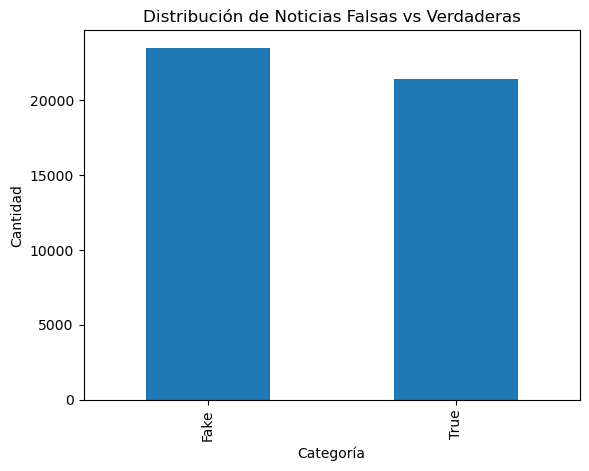

In [16]:
distribution = df_news['target'].value_counts()

distribution.plot(kind='bar')
plt.title('Distribución de Noticias Falsas vs Verdaderas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

En este contexto, la etiqueta "label" indica la fiabilidad de la noticia:

1: Indica que la noticia es poco confiable.

0: Indica que la noticia es confiable.

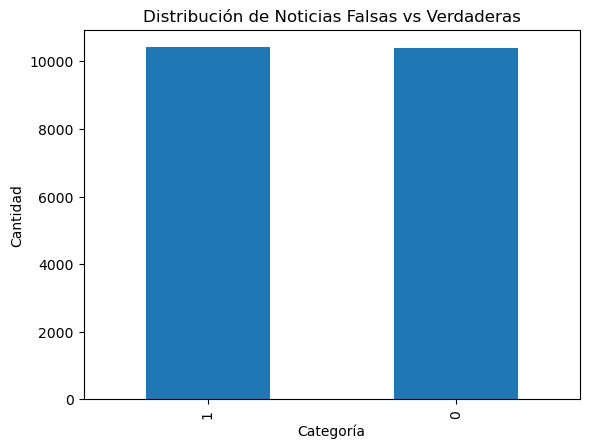

In [17]:
distribution = train_ds_filled['label'].value_counts()

distribution.plot(kind='bar')
plt.title('Distribución de Noticias Falsas vs Verdaderas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

## Distribución de noticias falsas y verdaderas de acuerdo a la longitud del texto

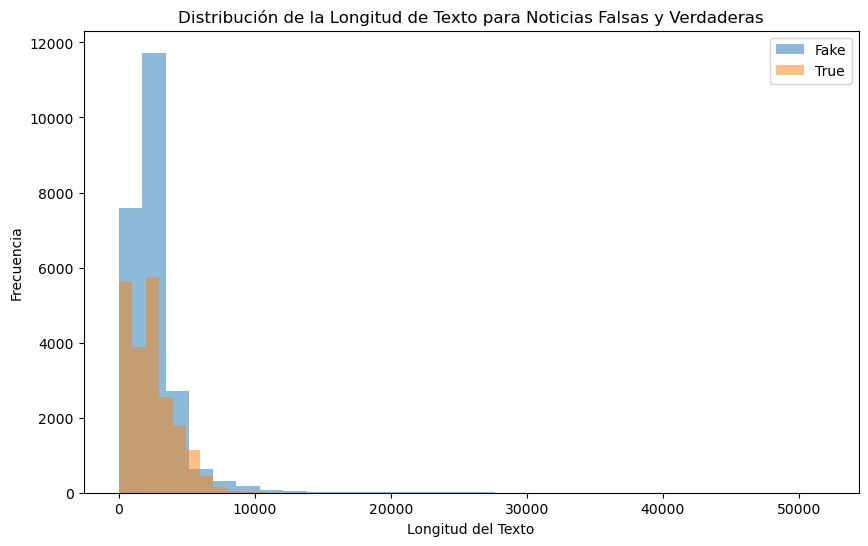

In [18]:
df_news['text_length'] = df_news['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df_news[df_news['target'] == 'Fake']['text_length'], alpha=0.5, label='Fake', bins=30)
plt.hist(df_news[df_news['target'] == 'True']['text_length'], alpha=0.5, label='True', bins=30)
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de Texto para Noticias Falsas y Verdaderas')
plt.legend()
plt.show()

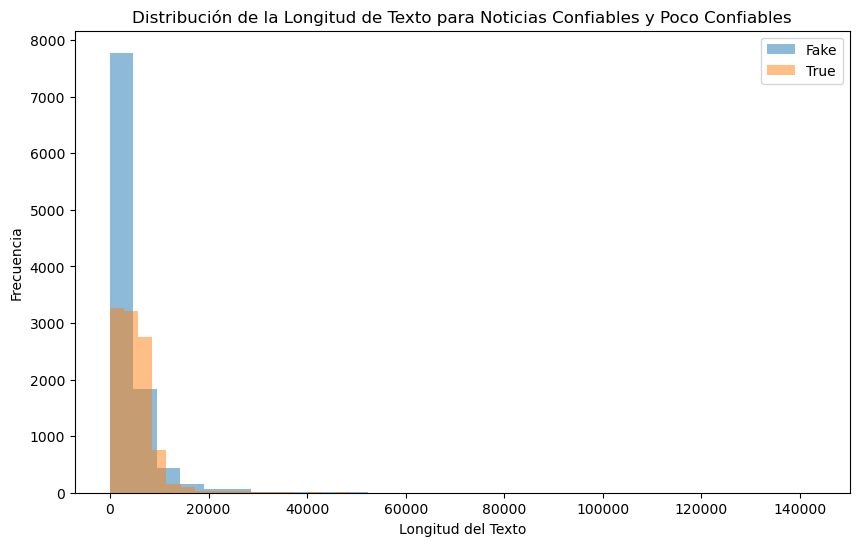

In [19]:
train_ds_filled['text_length'] = train_ds_filled['text'].apply(len)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(train_ds_filled[train_ds_filled['label'] == 1]['text_length'], alpha=0.5, label='Fake', bins=30)
plt.hist(train_ds_filled[train_ds_filled['label'] == 0]['text_length'], alpha=0.5, label='True', bins=30)
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de Texto para Noticias Confiables y Poco Confiables')
plt.legend()
plt.show()

## Extracción de fecha

In [19]:
df_news['date'] = df_news['date'].str.strip()
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')
df_news['year'] = df_news['date'].dt.year
df_news['month'] = df_news['date'].dt.month

In [20]:
df_news.head()

,title,text,subject,date,target,text_length,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Fake,2893,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Fake,1898,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Fake,3597,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Fake,2774,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Fake,2346,2017.0,12.0


In [22]:
df_news.tail()

,title,text,subject,date,target,text_length,year,month
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,True,2821,2017.0,8.0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,True,800,2017.0,8.0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,True,1950,2017.0,8.0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,True,1199,2017.0,8.0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,2017-08-22,True,1338,2017.0,8.0


## Correlacion entre año de publicación y tipo de noticia

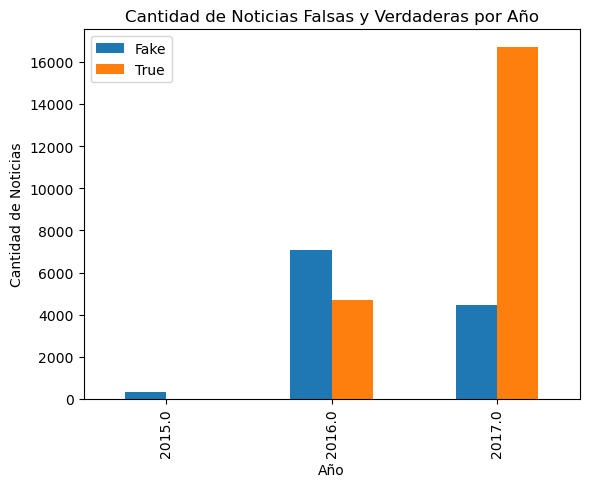

In [23]:
yearly_counts = df_news.groupby(['year', 'target']).size().unstack(fill_value=0)

yearly_counts.plot(kind='bar', stacked=False)
plt.title('Cantidad de Noticias Falsas y Verdaderas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Noticias')
plt.legend(['Fake', 'True'])
plt.show()

## Correlacion entre mes y tipo de noticia

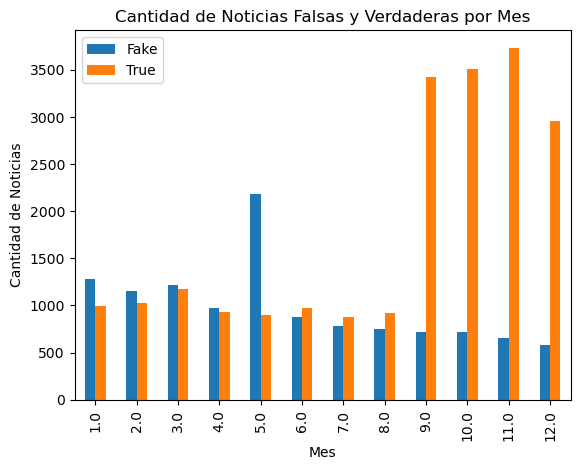

In [24]:
monthly_counts = df_news.groupby(['month', 'target']).size().unstack(fill_value=0)

monthly_counts.plot(kind='bar', stacked=False)
plt.title('Cantidad de Noticias Falsas y Verdaderas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Noticias')
plt.legend(['Fake', 'True'])
plt.show()

## Correlacion entre Tema y tipo de noticia 

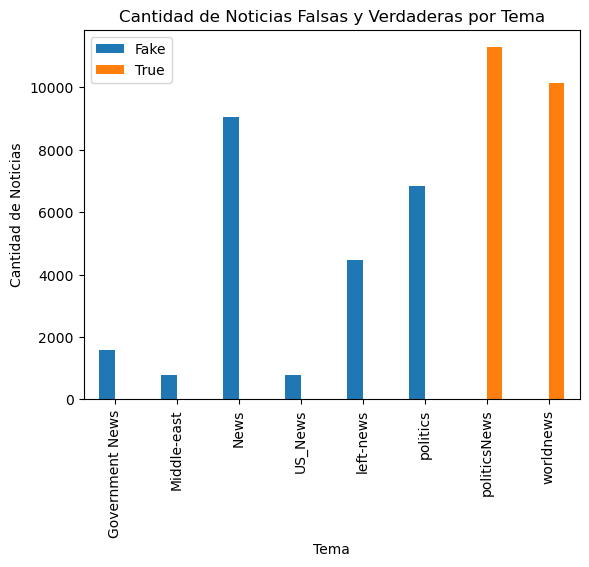

In [25]:
subject_counts = df_news.groupby(['subject', 'target']).size().unstack(fill_value=0)

subject_counts.plot(kind='bar', stacked=False)
plt.title('Cantidad de Noticias Falsas y Verdaderas por Tema')
plt.xlabel('Tema')
plt.ylabel('Cantidad de Noticias')
plt.legend(['Fake', 'True'])
plt.show()

## Correlación entre Tema y Año 

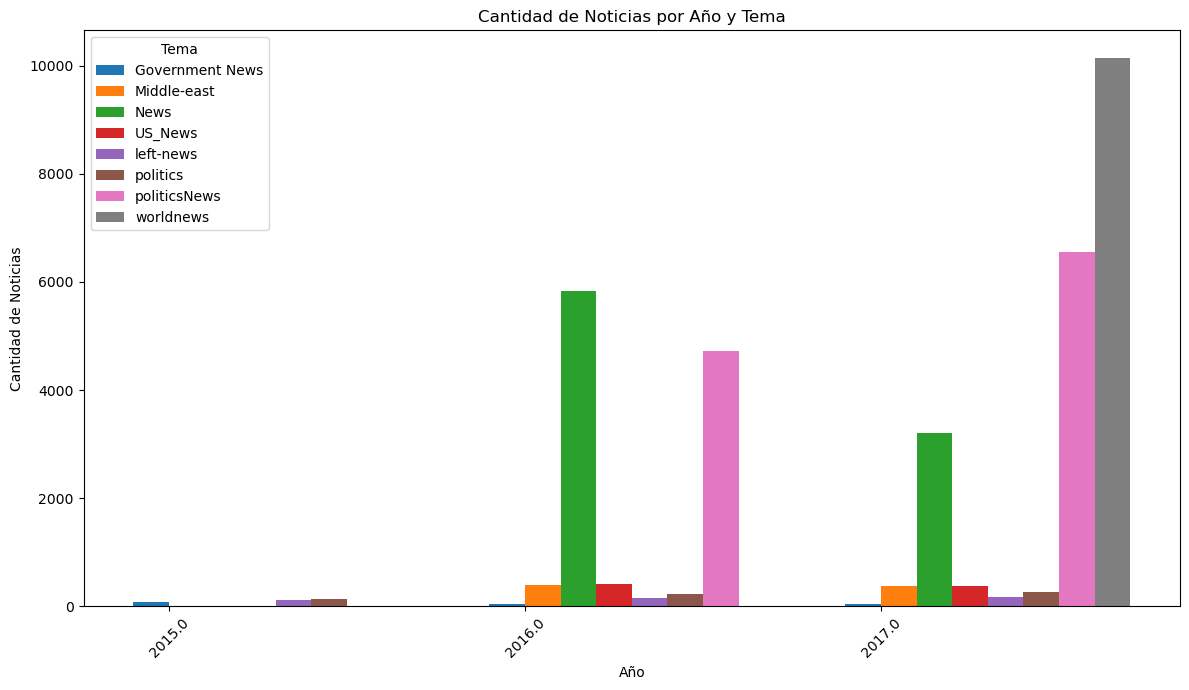

In [26]:
grouped = df_news.groupby(['year', 'subject']).size().unstack(fill_value=0)

subjects = grouped.columns

x = np.arange(len(grouped))
width = 0.1 

fig, ax = plt.subplots(figsize=(12, 7))
for i, subject in enumerate(subjects):
    ax.bar(x + i * width, grouped[subject], width, label=subject)

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Noticias')
ax.set_title('Cantidad de Noticias por Año y Tema')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(grouped.index)
plt.xticks(rotation=45)
ax.legend(title='Tema')

plt.tight_layout()
plt.show()

# Unión de dataframes train_ds_filled y df_news, con conversión de etiquetas

In [21]:

df_news['target'] = df_news['target'].map({'Fake': 1, 'True':0})

print(train_ds_filled.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


In [23]:
df_news.head()

,title,text,subject,date,target,text_length,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2893,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,1898,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,3597,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2774,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2346,2017.0,12.0


In [24]:
train_ds_filled.rename(columns={'label': 'target'}, inplace=True)
train_ds_filled.head()

,id,title,author,text,target
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [25]:

df_combined = pd.concat([train_ds_filled[['title', 'text', 'target']], df_news[['title', 'text', 'target']]])

df_combined.reset_index(drop=True, inplace=True)

df_combined.head()

,title,text,target
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   65698 non-null  object
 1   text    65698 non-null  object
 2   target  65698 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [27]:
print(df_combined.isnull().sum())

title     0
text      0
target    0
dtype: int64


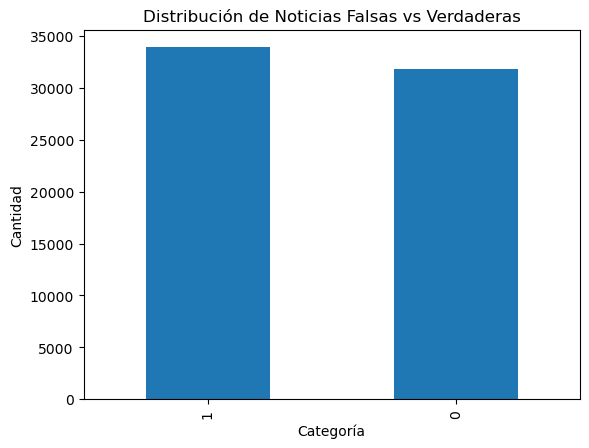

In [28]:
distribution = df_combined['target'].value_counts()

distribution.plot(kind='bar')
plt.title('Distribución de Noticias Falsas vs Verdaderas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

# Preparación de datos

In [34]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   65698 non-null  object
 1   text    65698 non-null  object
 2   target  65698 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB
None


# Entrenamiento del modelo

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df_combined[['title', 'text']]
y = df_combined['target']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'K Means': {
        'model': KMeans(),
        'params' : {
            'model__n_clusters': [2],  # Número de clusters
            'model__max_iter': [300, 400, 500],  # Número máximo de iteraciones
            'model__random_state': [42],  # Semilla aleatoria
            'model__n_init': [10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'model__C': [0.1, 1, 10]  
        }
    }
}

# Entrenamiento y ajuste de hiperparámetros
for model_name, model_data in models.items():
    print(f"Evaluating {model_name}...")
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('model', model_data['model'])
    ])
    grid_search = GridSearchCV(pipeline, model_data['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train['text'], y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")
    
    # Evaluación del modelo en el conjunto de prueba
    y_pred = grid_search.predict(X_test['text'])
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Precision for {model_name}: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall for {model_name}: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-score for {model_name}: {f1_score(y_test, y_pred, average='weighted')}")
    print()


Evaluating K Means...
Best parameters for K Means: {'model__max_iter': 300, 'model__n_clusters': 2, 'model__n_init': 10, 'model__random_state': 42}
Best cross-validation accuracy for K Means: 0.4995429228522935
Accuracy for K Means: 0.5105783866057839
Precision for K Means: 0.5173602816397112
Recall for K Means: 0.5105783866057839
F1-score for K Means: 0.5034995573442856

Evaluating Logistic Regression...
Best parameters for Logistic Regression: {'model__C': 10}
Best cross-validation accuracy for Logistic Regression: 0.9634309030750854
Accuracy for Logistic Regression: 0.9655251141552511
Precision for Logistic Regression: 0.965534293812039
Recall for Logistic Regression: 0.9655251141552511
F1-score for Logistic Regression: 0.9655272347843838

